# Impulse Response

"Flip" in convolution:
https://dsp.stackexchange.com/questions/5992/flipping-the-impulse-response-in-convolution/6355#6355

DFT:
https://en.wikipedia.org/wiki/Discrete_Fourier_transform

Matrix:
https://en.wikipedia.org/wiki/DFT_matrix

$$
h[n] = 1 + 2 \delta[n-1] + 3 \delta[n-2] + 4 \delta[n-3]
$$

In [1]:
# !pip install lcapy

https://lcapy.readthedocs.io/en/latest/discretetime.html

In [2]:
from lcapy import n, delta, Omega, z, k, seq
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_transforms(h, xlim=(-10, 10)):

    # plot impulse response
    h.plot(xlim, figsize=(6, 2)) #, ylim = [-1, 1])

    # DTFT
    H = h.DTFT(Omega)
    H.plot(
        Wvector=(-np.pi, np.pi), 
        plot_type='mag-phase', 
        **{
            'xscale': 1/np.pi,
        },
    )

    # Z-transform
    Z = h(z)
    Z.plot()

    # DFT
    K = h.DFT(k) #h(k)
    K.plot(xlim, figsize=(6, 2))

    return H, Z, K

/opt/anaconda3/lib/python3.9/site-packages/lcapy/dft.py:50: UserWarning: DFT of delta, assuming 0 is in interval [0, k - 1]
  warn('DFT of %s, assuming %s is in interval [%s, %s]' %
/opt/anaconda3/lib/python3.9/site-packages/lcapy/dft.py:50: UserWarning: DFT of delta, assuming 3 is in interval [0, k - 1]
  warn('DFT of %s, assuming %s is in interval [%s, %s]' %
/opt/anaconda3/lib/python3.9/site-packages/lcapy/dft.py:50: UserWarning: DFT of delta, assuming 2 is in interval [0, k - 1]
  warn('DFT of %s, assuming %s is in interval [%s, %s]' %
/opt/anaconda3/lib/python3.9/site-packages/lcapy/dft.py:50: UserWarning: DFT of delta, assuming 1 is in interval [0, k - 1]
  warn('DFT of %s, assuming %s is in interval [%s, %s]' %


    2   3    4 
1 + ─ + ── + ──
    z    2    3
        z    z 

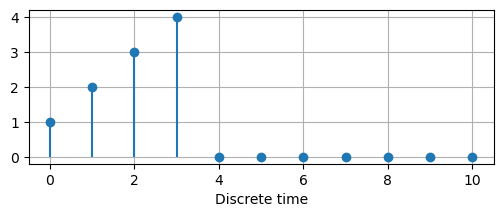

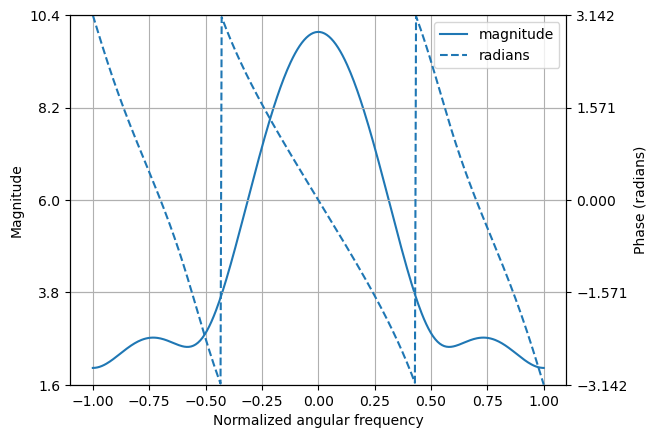

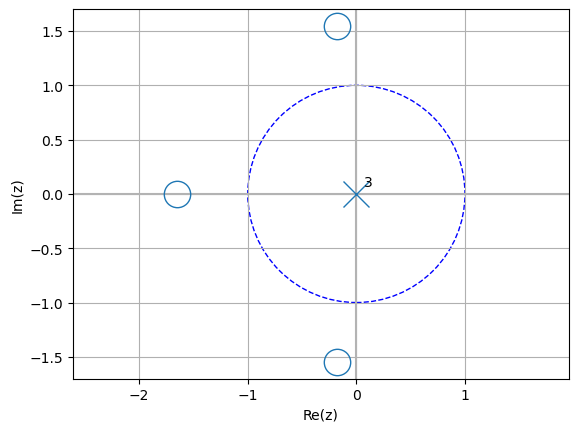

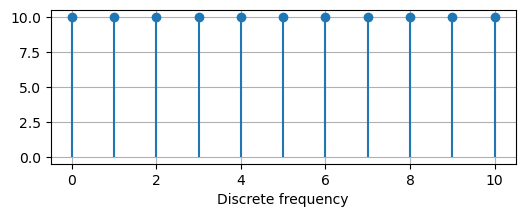

In [4]:
h = delta(n) + 2*delta(n-1) + 3*delta(n-2) + 4*delta(n-3)
H, Z, K = plot_transforms(h, (0, 10))
Z

Text(0.5, 1.0, '$H(z) = 1 + 2z^{-1} + 3z^{-2} + 4z^{-3}$')

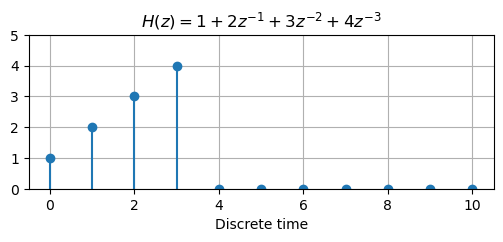

In [32]:
ax = h.plot((0, 10), figsize=(6, 2))
ax.set_ylim(0, 5)
ax.set_title('$H(z) = 1 + 2z^{-1} + 3z^{-2} + 4z^{-3}$')

Text(0.5, 1.0, 'Example $x[n]$')

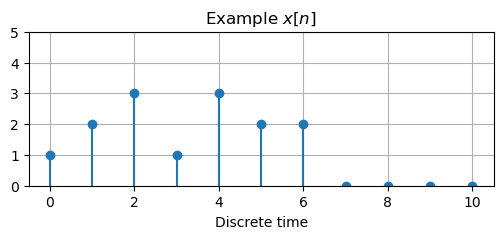

In [34]:
x = seq((1, 2, 3, 1, 3, 2, 2))
ax = x.plot((0, 10), figsize=(6, 2))
ax.set_ylim(0, 5)
ax.set_title('Example $x[n]$')

Text(0.5, 1.0, '$y = x * h$')

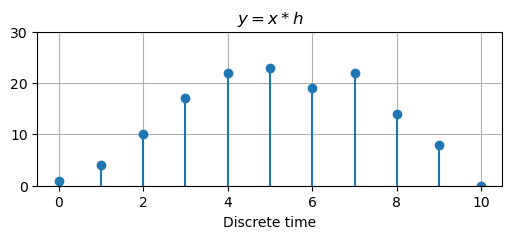

In [27]:
y = x.convolve(h.seq())
ax = y.plot((0, 10), figsize=(6, 2))
ax.set_ylim(0, 30)
ax.set_title('$y = x * h$')

Text(0.5, 1.0, '$y[2n]$')

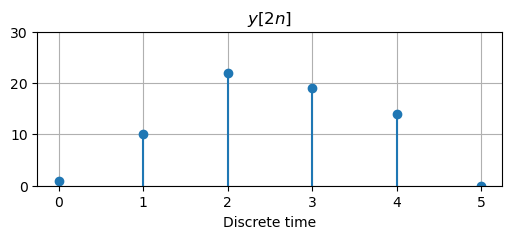

In [52]:
yd2 = y.as_array()[::2]
yd2 = seq(yd2)
ax = yd2.plot((0, 5), figsize=(6, 2))
ax.set_ylim(0, 30)
ax.set_title('$y[2n]$')

Polyphase version:

Text(0.5, 1.0, '$H(z) = 1 + 2z^{-1} + 3z^{-2} + 4z^{-3}$')

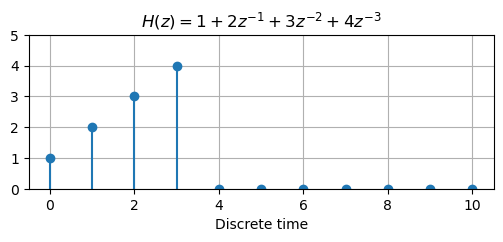

In [88]:
ax = h.plot((0, 10), figsize=(6, 2))
ax.set_ylim(0, 5)
ax.set_title('$H(z) = 1 + 2z^{-1} + 3z^{-2} + 4z^{-3}$')

Text(0.5, 1.0, '$H_{odd} = 2 + 4z^{-2}$')

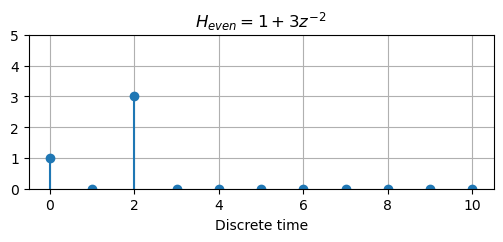

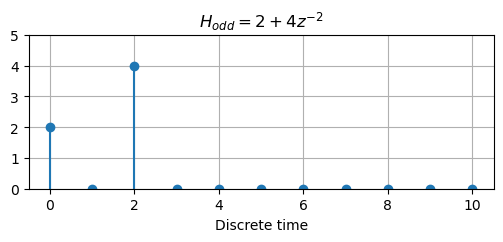

In [33]:
h_even = delta(n) + 3*delta(n-2)
h_odd = 2*delta(n) + 4*delta(n-2)

ax = h_even.plot((0, 10), figsize=(6, 2))
ax.set_ylim(0, 5)
ax.set_title('$H_{even} = 1 + 3z^{-2}$')

ax = h_odd.plot((0, 10), figsize=(6, 2))
ax.set_ylim(0, 5)
ax.set_title('$H_{odd} = 2 + 4z^{-2}$')

Text(0.5, 1.0, '$y = x*h_{even} + xz^{-1}*h_{odd}$')

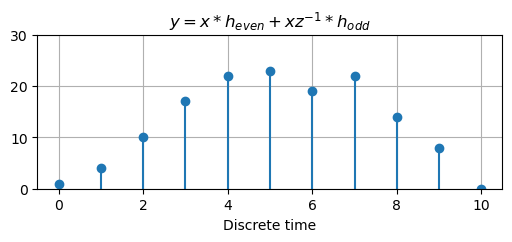

In [90]:
u1 = x.convolve(h_even.seq())
u2 = x.convolve(delta(n-1).seq()).convolve(h_odd.seq())
v = u1 + u2
ax = v.plot((0, 10), figsize=(6, 2))
ax.set_ylim(0, 30)
ax.set_title('$y = x*h_{even} + xz^{-1}*h_{odd}$')

Text(0.5, 1.0, '$y[2n]$')

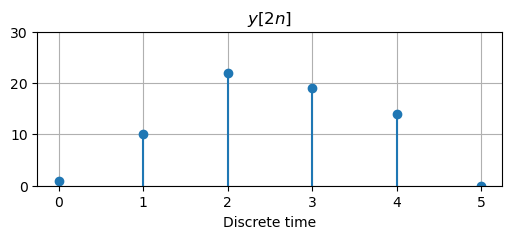

In [91]:
vd2 = v.as_array()[::2]
vd2 = seq(vd2)
ax = vd2.plot((0, 5), figsize=(6, 2))
ax.set_ylim(0, 30)
ax.set_title('$y[2n]$')

With Noble Identity:

In [86]:
x1 = x
x2 = x1.convolve(delta(n-1).seq())

x3 = seq(x1.as_array()[::2])

x4 = seq(x2.as_array()[1::2]).delay(1) # lcapy ignores the first zero (from delay?)

h_even_d2 = seq(h_even.seq().as_array()[::2])
h_odd_d2 = seq(h_odd.seq().as_array()[::2])

y1 = x3.convolve(h_even_d2)
y2 = x4.convolve(h_odd_d2)

y_out = y1 + y2

Text(0.5, 1.0, '$y = y_1 + y_2$')

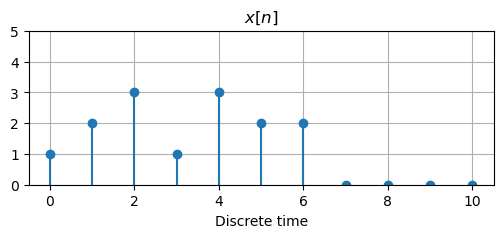

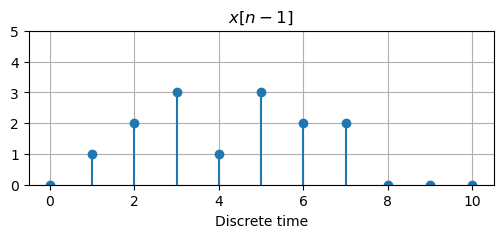

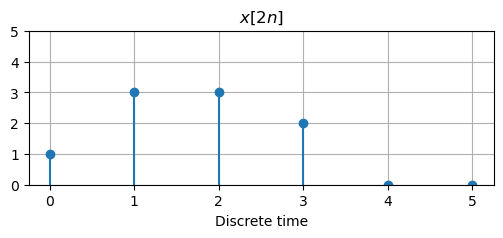

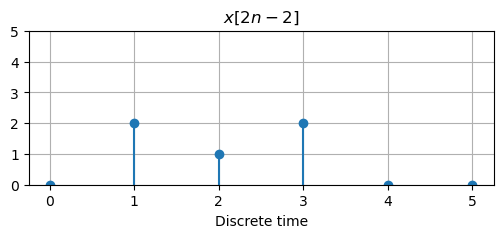

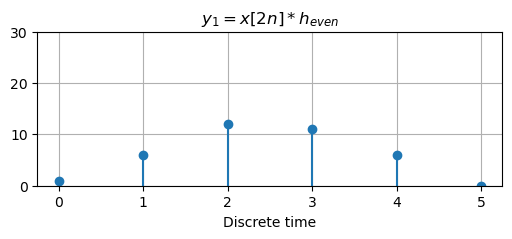

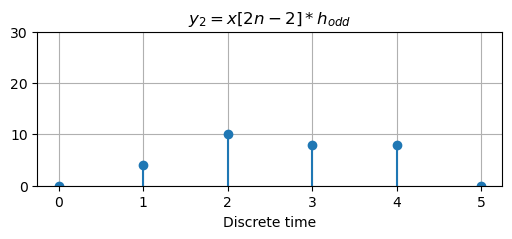

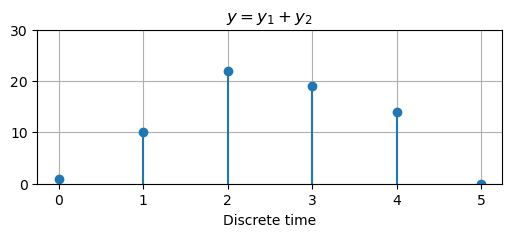

In [87]:
ax = x1.plot((0, 10), figsize=(6, 2))
ax.set_ylim(0, 5)
ax.set_title('$x[n]$')

ax = x2.plot((0, 10), figsize=(6, 2))
ax.set_ylim(0, 5)
ax.set_title('$x[n-1]$')

ax = x3.plot((0, 5), figsize=(6, 2))
ax.set_ylim(0, 5)
ax.set_title('$x[2n]$')

ax = x4.plot((0, 5), figsize=(6, 2))
ax.set_ylim(0, 5)
ax.set_title('$x[2n-2]$')

ax = y1.plot((0, 5), figsize=(6, 2))
ax.set_ylim(0, 30)
ax.set_title('$y_1 = x[2n] * h_{even}$')

ax = y2.plot((0, 5), figsize=(6, 2))
ax.set_ylim(0, 30)
ax.set_title('$y_2 = x[2n-2] * h_{odd}$')

ax = y_out.plot((0, 5), figsize=(6, 2))
ax.set_ylim(0, 30)
ax.set_title('$y = y_1 + y_2$')